In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import celluloid
plt.style.use("ggplot")

# logistic regression

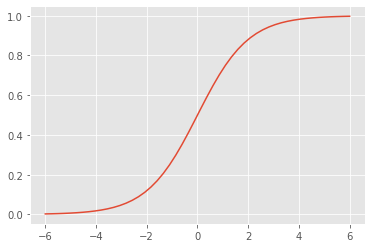

In [2]:
def sigmoid(z):
    return 1 / (1 + np.e**(-z))

x = np.linspace(-6,6)
plt.plot(x,sigmoid(x))

## one feature regression

In [3]:
np.random.seed(1)
# build a dataset
n = 100
x = np.append(15 * np.random.randn(n) + 45,
              6 * np.random.randn(n))
y = np.append(np.zeros(shape=n),
              np.ones(shape=n))
# normalize dataset
x = (x - x.mean()) / x.std()

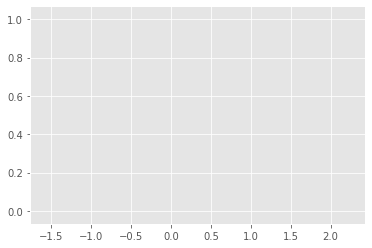

In [4]:
# initialize parameters
learning_rate = 0.25
w = np.squeeze(np.random.uniform(-0.1, 0.1, size=1))
b = 0

# optimize and visualize
fig = plt.figure()
camera = celluloid.Camera(fig)
for i in range(50):
    activations = sigmoid(w*x + b)
    loss = np.mean(-y*np.log(activations) - (1-y)*np.log(1-activations))
    dloss = (activations - y)
    w -= learning_rate * (x * dloss).mean()
    b -= learning_rate * dloss.mean()
    domain = np.linspace(x.min(),x.max(), 50)
    s = plt.plot(domain, sigmoid(w*domain+b), color="black")
    plt.legend(s, [f"w={w:.2f}, b={b:.2f}"])
    plt.scatter(x[activations >= 0.5], y[activations >= 0.5], color="red")
    plt.scatter(x[activations < 0.5],  y[activations < 0.5],  color="blue")
    camera.snap()
    
animation = camera.animate(interval=100)
HTML(animation.to_html5_video())

## 2 feature regression

In [5]:
n = 100
X = np.concatenate((3*np.random.randn(n,2)+4,
                    5*np.random.randn(n,2)-6)).T
y = np.concatenate((np.zeros(shape=(n,1)),
                    np.ones(shape=(n,1)))).T

X = (X - X.mean()) / X.std()

In [6]:
rez = 100
d0 = np.linspace(X[0,:].min(), X[0,:].max(), rez)
d1 = np.linspace(X[1,:].min(), X[1,:].max(), rez)
d0, d1 = np.meshgrid(d0, d1)

Done with gradient descent...
Rendering...


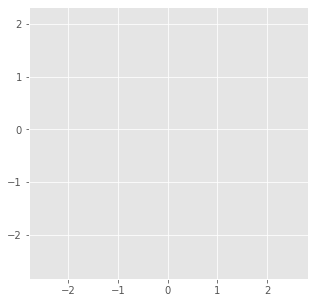

In [9]:
W = np.random.uniform(-0.5, 0.5, size=(2,1))
b = 0

learning_rate = 0.1

fig, ax = plt.subplots(figsize=(5,5))
camera = celluloid.Camera(fig)
for i in range(50):
    if i % 10:
        learning_rate *= 0.99
        
    activations = sigmoid(W.T@X + b)
    loss = np.mean(-y*np.log(activations) - (1-y)*np.log(1-activations))
    dloss = (activations - y)
    W -= learning_rate * (X * dloss).mean()
    b -= learning_rate * dloss.mean()
    
    correct_classification = np.squeeze((0.5 < activations) == y)
    
    if i % 25:
        contour = ax.contour(d0,
                             d1,
                             (W[0] * d0) + (W[1] * d1) + b,
                             levels=[0.25, 0.5, 0.75])
        correct = ax.scatter(X[0,correct_classification],
                             X[1,correct_classification],
                             c=np.squeeze(y[:,correct_classification]),
                             marker=".")
        incorrect = ax.scatter(X[0,~correct_classification],
                               X[1,~correct_classification],
                               color="red",
                               marker="x")
        ax.legend([f"w=[{W[0][0]:.2f},{W[1][0]:.2f}], "
                   f"b={b:.2f}, "
                   f"acc={correct_classification.mean():.2f}"])
    
    camera.snap()
print("Done with gradient descent...")
print("Rendering...")
animation = camera.animate(interval=100)
HTML(animation.to_html5_video())